# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/previous/FPL_logs.csv')

# General info

In [4]:
df.columns

Index(['Date', 'Day', 'Venue', 'Team', 'Opponent', 'Name', 'Start', 'Pos',
       'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR',
       'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA',
       'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC', 'T_att', 'T_succ',
       'Season', 'WDL', 'Team_score', 'Opp_score', 'Team_CS', 'Was_home', 'GW',
       'Clean_name', 'FPL_name', 'FPL_team', 'FPL_opp_team', 'Name_original',
       'FPL_pos', 'FPL_ast', 'Bonus', 'Bps', 'Player_CS', 'Creativity',
       'Element', 'Fixture', 'Player_GC', 'Goals_scored', 'ICT_index',
       'Influence', 'Kickoff_time', 'FPL_min', 'Own_goals', 'Penalties_missed',
       'Penalties_saved', 'Saves', 'Selected', 'Threat', 'FPL_points',
       'Transfers_balance', 'Transfers_in', 'Transfers_out', 'Price', 'FPL_GW',
       'xP', 'FPL_xA', 'FPL_xGI', 'FPL_xG', 'FPL_xGC', 'Opp_rating',
       'Team_rating', 'Min_points', 'Avg_FPL_points'],
      dtype='object')

In [5]:
df.shape

(18674, 81)

In [6]:
df.describe()

,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,T_att,T_succ,Team_score,Opp_score,Team_CS,Was_home,GW,Clean_name,FPL_ast,Bonus,Bps,Player_CS,Creativity,Element,Fixture,Player_GC,Goals_scored,ICT_index,Influence,FPL_min,Own_goals,Penalties_missed,Penalties_saved,Saves,Selected,Threat,FPL_points,Transfers_balance,Transfers_in,Transfers_out,Price,FPL_GW,xP,FPL_xA,FPL_xGI,FPL_xG,FPL_xGC,Opp_rating,Team_rating,Min_points,Avg_FPL_points
count,18670.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18361.000000,18361.000000,18674.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18206.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,0.0,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,18674.000000,1.867400e+04,18674.000000,18674.000000,1.867400e+04,1.867400e+04,1.867400e+04,18674.000000,0.0,18550.000000,904.000000,904.000000,904.000000,904.000000,18674.000000,18674.000000,0.0,18674.000000
mean,54.605785,0.077809,0.057460,0.006265,0.007658,0.706062,0.235622,0.099282,0.002517,34.656228,0.915201,0.496626,0.647350,0.080666,0.074528,0.059697,1.286150,0.140951,22.724089,28.512227,60.007750,2.174337,19.662927,0.995098,0.984478,0.482926,1.508836,1.300418,0.302292,0.500910,18.676449,NaN,0.071543,0.191657,10.174628,0.187373,7.954846,293.906073,182.124772,0.789922,0.077059,2.806646,11.627022,54.324622,0.002785,0.001392,0.000964,0.155939,3.964763e+05,8.495716,2.369980,9.913169e+03,3.091609e+04,2.100290e+04,5.284835,NaN,2.567261,0.062301,0.153650,0.091372,0.973573,1779.888667,1799.861869,NaN,2.369980
std,38.999449,0.299944,0.249602,0.082880,0.091958,1.175892,0.568137,0.303140,0.050107,29.608833,1.339466,0.886908,1.015232,0.199107,0.177537,0.152288,1.830874,0.422877,22.931235,26.489211,34.058607,2.862375,18.759806,1.603298,1.628694,0.956656,1.337636,1.242137,0.459263,0.500013,11.346943,NaN,0.280617,0.644611,10.942290,0.390221,13.025581,188.873906,113.493033,1.093127,0.298348,3.440632,14.616330,39.196702,0.052697,0.037289,0.031033,0.803846,8.944854e+05,15.666284,2.993028,9.161203e+04,9.027080e+04,5.418694e+04,1.333610,NaN,2.486137,0.129327,0.280352,0.221806,0.979229,109.704625,110.656955,NaN,1.259351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,-19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-4.000000,-1.018924e+06,0.000000e+00,0.000000e+00,3.700000,NaN,-3.000000,0.000000,0.000000,0.000000,0.000000,1579.959106,1579.959106,NaN,-2.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,50.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,81.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.896825e+04,0.000000,0.000000,-2.628500e+03,4.142500e+02,7.012500e+02,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.080000,1701.295044,1718.083862,NaN,1.480769
50%,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17.000000,25.000000,73.900000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000

In [7]:
df[["xP", "FPL_points"]].describe()

,xP,FPL_points
count,18550.000000,18674.000000
mean,2.567261,2.369980
std,2.486137,2.993028
min,-3.000000,-4.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.500000,3.000000
max,19.000000,24.000000


In [8]:
df["xP"].sum(), df["FPL_points"].sum()

(47622.7, 44257)

In [9]:
df["xG"].sum(), df["Gls"].sum()

(1481.1000000000001, 1453.0)

In [10]:
df["xA"].sum(), df["Ast"].sum()

(1096.1000000000001, 1073.0)

In [11]:
df.isna().sum().sort_values(ascending=False).head(30)

FPL_GW             18674
Min_points         18674
Clean_name         18674
FPL_xA             17770
FPL_xGC            17770
FPL_xG             17770
FPL_xGI            17770
Cmp%                 468
xA                   313
SCA                  313
Cmp                  313
Att                  313
GCA                  313
PrgP                 313
xG                   313
Carries              313
PrgC                 313
T_att                313
T_succ               313
npxG                 313
Tkl                  313
Blocks               313
Touches              313
xP                   124
Min                    4
Pos                    4
Kickoff_time           0
Penalties_saved        0
Influence              0
ICT_index              0
dtype: int64

# Plots

<AxesSubplot:xlabel='Team', ylabel='FPL_points'>

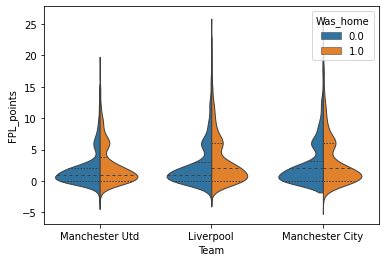

In [12]:
sns.violinplot(data=df[df["Team"].isin(["Liverpool", "Manchester City", "Manchester Utd"])], 
               x="Team", y="FPL_points", hue="Was_home",
               split=True, inner="quart", linewidth=1)

In [13]:
df["PKatt"].sum(), df["PK"].sum(), df["Penalties_saved"].sum()

(143.0, 117.0, 18)

[Text(0, 0, '100.00%'),
 Text(0, 0, '81.82%'),
 Text(0, 0, '12.59%'),
 Text(0, 0, '5.59%')]

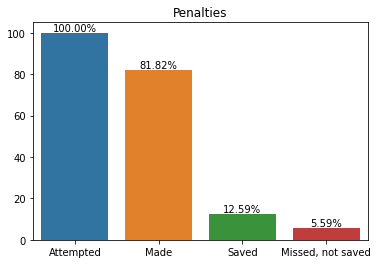

In [14]:
att = df["PKatt"].sum()
made = df["PK"].sum()
saved = df["Penalties_saved"].sum()
missed = att - made - saved
[att, made, saved, missed] = [att, made, saved, missed] / att * 100

ax = sns.barplot(x=["Attempted", "Made", "Saved", "Missed, not saved"], y=[att, made, saved, missed])
ax.set(title='Penalties')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

[Text(0, 0, '62.53%'), Text(0, 0, '37.47%')]

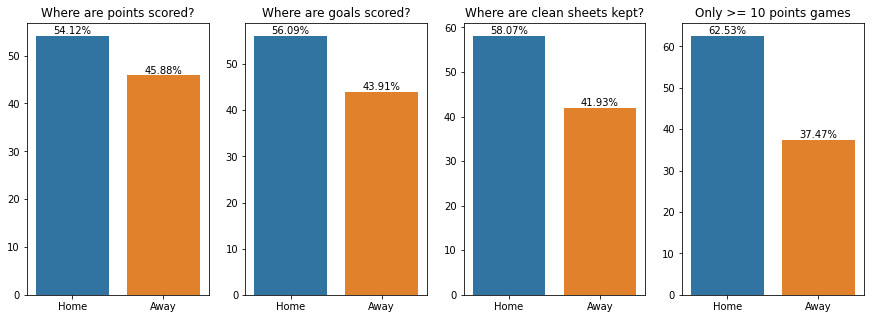

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(15, 5)

# ax1
home = df[df["Was_home"] == True]["FPL_points"].sum()
not_home = df[df["Was_home"] == False]["FPL_points"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax1)
ax.set(title='Where are points scored?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax2
home = df[df["Was_home"] == True]["Gls"].sum()
not_home = df[df["Was_home"] == False]["Gls"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax2)
ax.set(title='Where are goals scored?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax3
home = df[df["Was_home"] == True]["Player_CS"].sum()
not_home = df[df["Was_home"] == False]["Player_CS"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax3)
ax.set(title='Where are clean sheets kept?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax4
home = df[(df["Was_home"] == True) & (df["FPL_points"] >= 10)]["Player_CS"].sum()
not_home = df[(df["Was_home"] == False) & (df["FPL_points"] >= 10)]["Player_CS"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax4)
ax.set(title='Only >= 10 points games')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

[Text(0, 0, '2.00'),
 Text(0, 0, '2.17'),
 Text(0, 0, '2.52'),
 Text(0, 0, '2.78')]

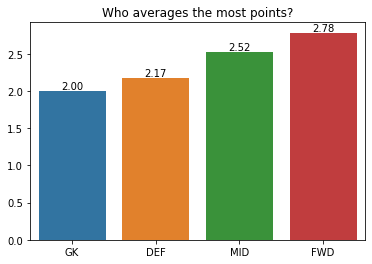

In [16]:
gks = df[df["FPL_pos"] == "GK"]["FPL_points"].mean()
defs = df[df["FPL_pos"] == "DEF"]["FPL_points"].mean()
mids = df[df["FPL_pos"] == "MID"]["FPL_points"].mean()
fwds = df[df["FPL_pos"] == "FWD"]["FPL_points"].mean()
# [home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["GK", "DEF", "MID", "FWD"], y=[gks, defs, mids, fwds])
ax.set(title='Who averages the most points?')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')